<a href="https://colab.research.google.com/github/lerj2710/Historia-de-atlelas-olimpicos/blob/main/Olympic_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Exploracion de los datos


*   Utilizar pandas para cargar el conjunto de Datos (DataFrame)
*   Realizar un analis exploratorio
*   Identificar las variables de interes





In [ ]:
# importando librerias
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# conectando el cuaderno actual al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importar datos y convertirlos en un nuevo DataFrame
athlete_events = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')
noc_regions = pd.read_csv('/content/drive/MyDrive/noc_regions.csv')


In [ ]:
#mostar los atletas y los eventos en sus categoria
athlete_events.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# mostar region
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
# mostrar la estadisticas descritas en un conjunto de datos
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
# let's join dataset ( unir datos mediante let join )
df=athlete_events.merge(noc_regions, on='NOC',how='left')

In [ ]:
# motrar el join
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


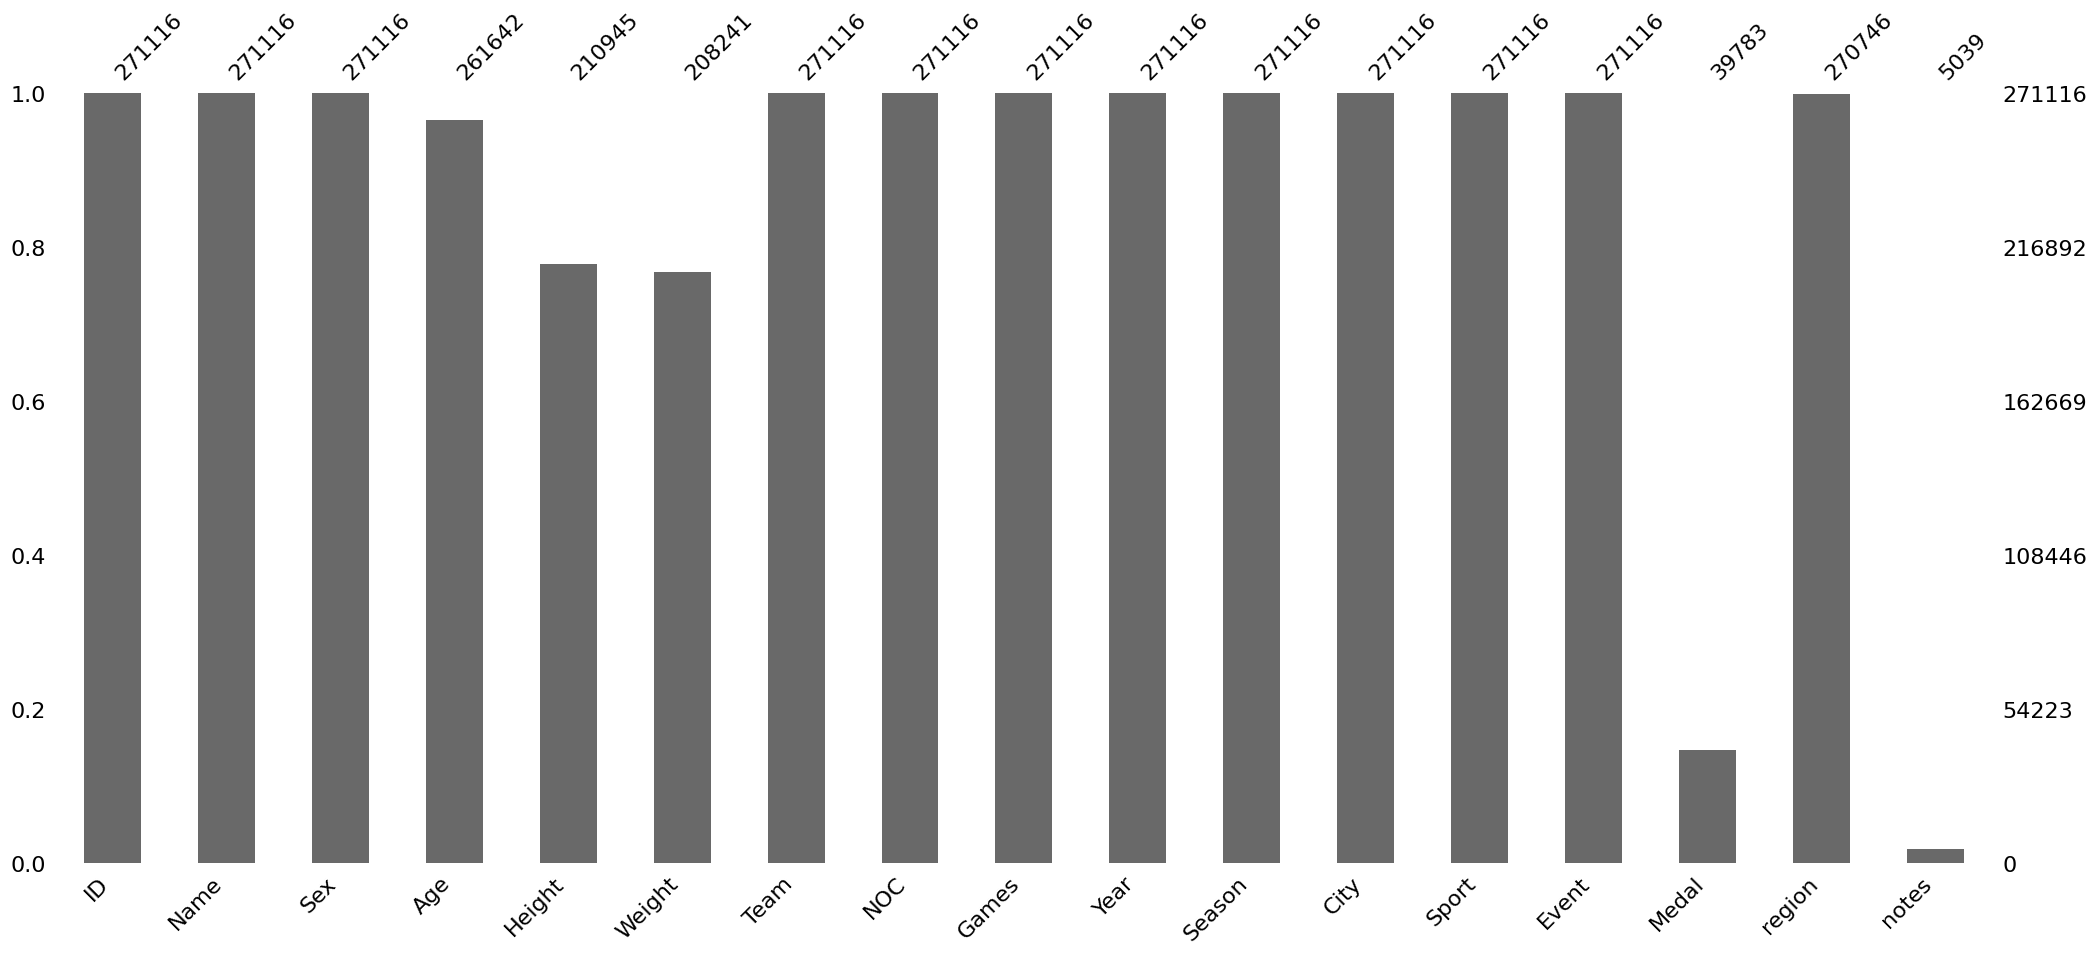

In [ ]:
msn.bar(df)
plt.show()

In [ ]:
# importar las variables de interes
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

2. Limpieza de datos:



*   Identificar y manejar valores faltante
*   convertir los datos si es necesario



In [ ]:
# renombrando o convertir los variables que estban en minusculas la inicial
df.rename(columns={'region':'Region', 'notes':'Notes'},inplace=1)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [ ]:
# checar valores nulos o faltantes
NaN_values = df.isna()
NaN_columns = NaN_values.any()
NaN_columns

,0
ID,False
Name,False
Sex,False
Age,True
Height,True
Weight,True
Team,False
NOC,False
Games,False
Year,False


In [ ]:
df.drop('Notes',axis=1,inplace=True)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [ ]:
df[df['Weight']>80]['Weight']

,Weight
4,82.0
5,82.0
6,82.0
7,82.0
8,82.0
...,...
271090,95.0
271091,89.0
271111,89.0
271114,96.0


In [ ]:
df.iloc[[3,6,9],[2,3]]


,Sex,Age
3,M,34.0
6,F,25.0
9,F,27.0


In [ ]:
df[(df['Weight']>80) & (df['City']=='Barcelona')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,Estonia
169,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 500 metres",NaN,Cuba
170,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",NaN,Cuba
223,107,Carmine Abbagnale,M,30.0,182.0,90.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,Italy
228,108,Giuseppe Abbagnale,M,33.0,187.0,97.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,135235,Ronald Zoodsma,M,25.0,201.0,90.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,Netherlands
270407,135261,Andrea Zorzi,M,26.0,201.0,102.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,NaN,Italy
270644,135357,Ji Zubrick,M,28.0,188.0,161.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,Czech Republic
271015,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,200.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,Netherlands


In [ ]:
df[(df['Weight']>80) & (df['City']=='Barcelona')][['Team','City','Sport']]

,Team,City,Sport
137,Estonia,Barcelona,Wrestling
169,Cuba,Barcelona,Canoeing
170,Cuba,Barcelona,Canoeing
223,Italy,Barcelona,Rowing
228,Italy,Barcelona,Rowing
...,...,...,...
270349,Netherlands,Barcelona,Volleyball
270407,Italy,Barcelona,Volleyball
270644,Czechoslovakia,Barcelona,Weightlifting
271015,Netherlands,Barcelona,Volleyball


3.  visualizacion explotaria


*   Distribucion de medallas por pais
*   Evolucion del numero de atletas y paises participantes a lo largo del tiempo
*   Relacion entre edad y desempeño
*   Comparacion entre deportes
*   Mapas




In [ ]:
# mostar los paises que han ganado medallas mediante un cuadro
df.groupby('region')['Medal'].count().nlargest(20).reset_index()

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


from matplotlib import pyplot as plt
_df_0['Medal'].plot(kind='hist', bins=20, title='Medal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Medal'].plot(kind='line', figsize=(8, 4), title='Medal')
plt.gca().spines[['top', 'right']].set_visible(False)

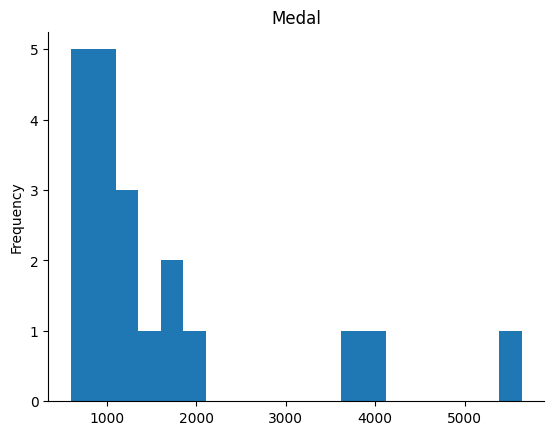

In [ ]:
# mostar la frecuencia de medallas
from matplotlib import pyplot as plt
_df_0['Medal'].plot(kind='hist', bins=20, title='Medal')
plt.gca().spines[['top', 'right',]].set_visible(False)

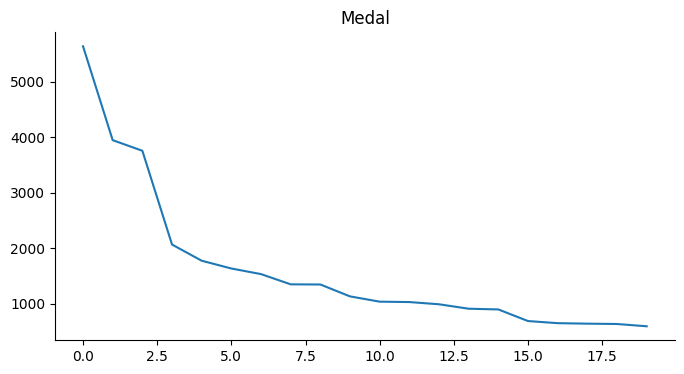

In [ ]:

from matplotlib import pyplot as plt
_df_1['Medal'].plot(kind='line', figsize=(8, 4), title='Medal')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Top_10_Countries = df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10_Countries

,count
Team,
United States,17847
France,11988
Great Britain,11404
Italy,10260
Germany,9326
Canada,9279
Japan,8289
Sweden,8052
Australia,7513


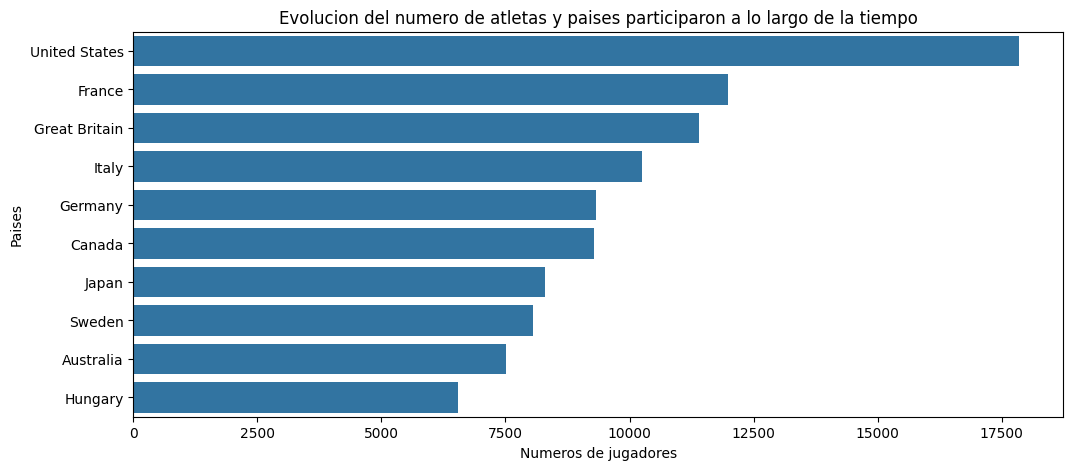

In [ ]:
# paises que han participado a lo largo de la historia
plt.figure(figsize=(12,5))
sns.barplot(x=Top_10_Countries, y=Top_10_Countries.index)
plt.title('Evolucion del numero de atletas y paises participaron a lo largo de la tiempo')
plt.xlabel('Numeros de jugadores')
plt.ylabel('Paises')
plt.show()

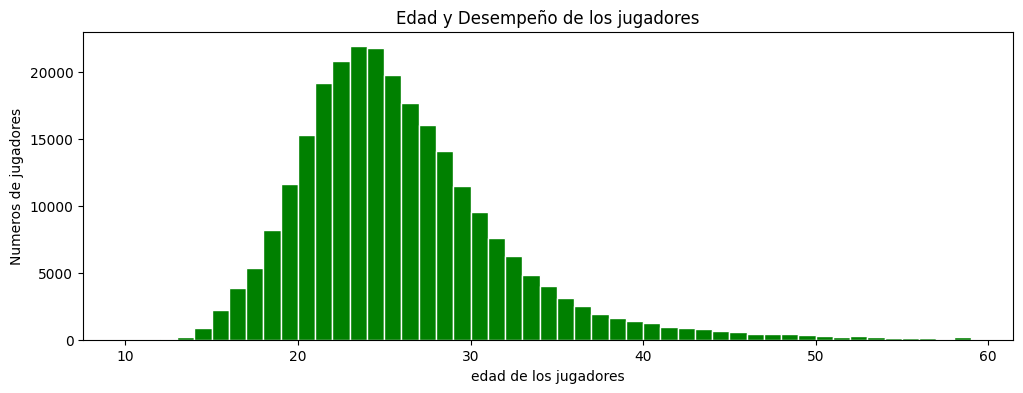

In [ ]:
# Relacion entre edad y desempeño
plt.figure(figsize=(12,4))
plt.hist(df.Age, bins=np.arange(10,60), color='Green', edgecolor='white')
plt.title('Edad y Desempeño de los jugadores')
plt.xlabel('edad de los jugadores')
plt.ylabel('Numeros de jugadores')
plt.show()

In [ ]:
participants=df.groupby('Year')['Name'].count().reset_index()
participants

,Year,Name
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


from matplotlib import pyplot as plt
participants['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
participants['Name'].plot(kind='hist', bins=20, title='Name')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
participants.plot(kind='scatter', x='Year', y='Name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Name']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = participants.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Name')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = participants.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
participants['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
participants['Name'].plot(kind='line', figsize=(8, 4), title='Name')
plt.gca().spines[['top', 'right']].set_visible(False)

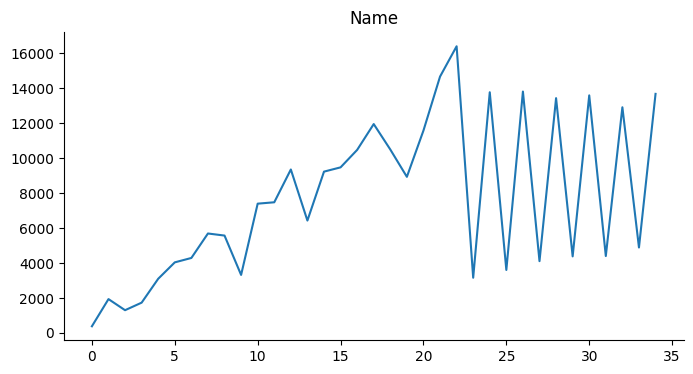

In [ ]:
from matplotlib import pyplot as plt
participants['Name'].plot(kind='line', figsize=(8, 4), title='Name')
plt.gca().spines[['top', 'right']].set_visible(False)

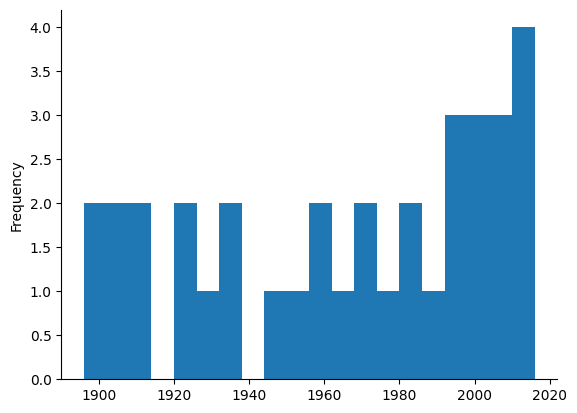

In [ ]:
from matplotlib import pyplot as plt
participants['Year'].plot(kind='hist', bins=20, title='')
plt.gca().spines[['top', 'right',]].set_visible(False)

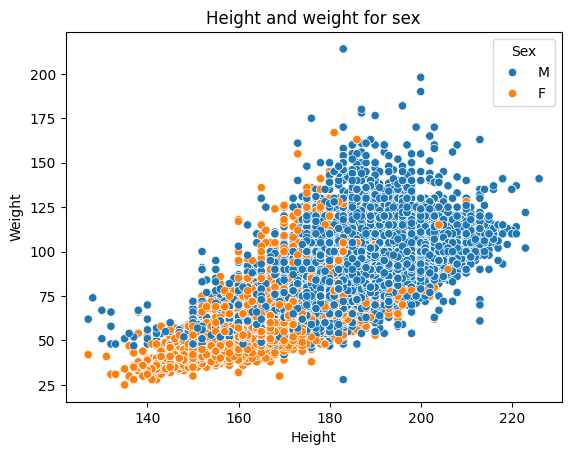

In [ ]:
# comparacion entre atletar alturas y peso por distintos tipos de peso
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=df)
plt.title('Height and weight for sex')
plt.show()